# Part 1: Import Libraries

In [1]:
import pandas as pd
# from sklearn.datasets import load_iris
from sklearn.datasets import load_wine
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")  # Suppress all warnings


# Part 2: Load and Explore Data

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


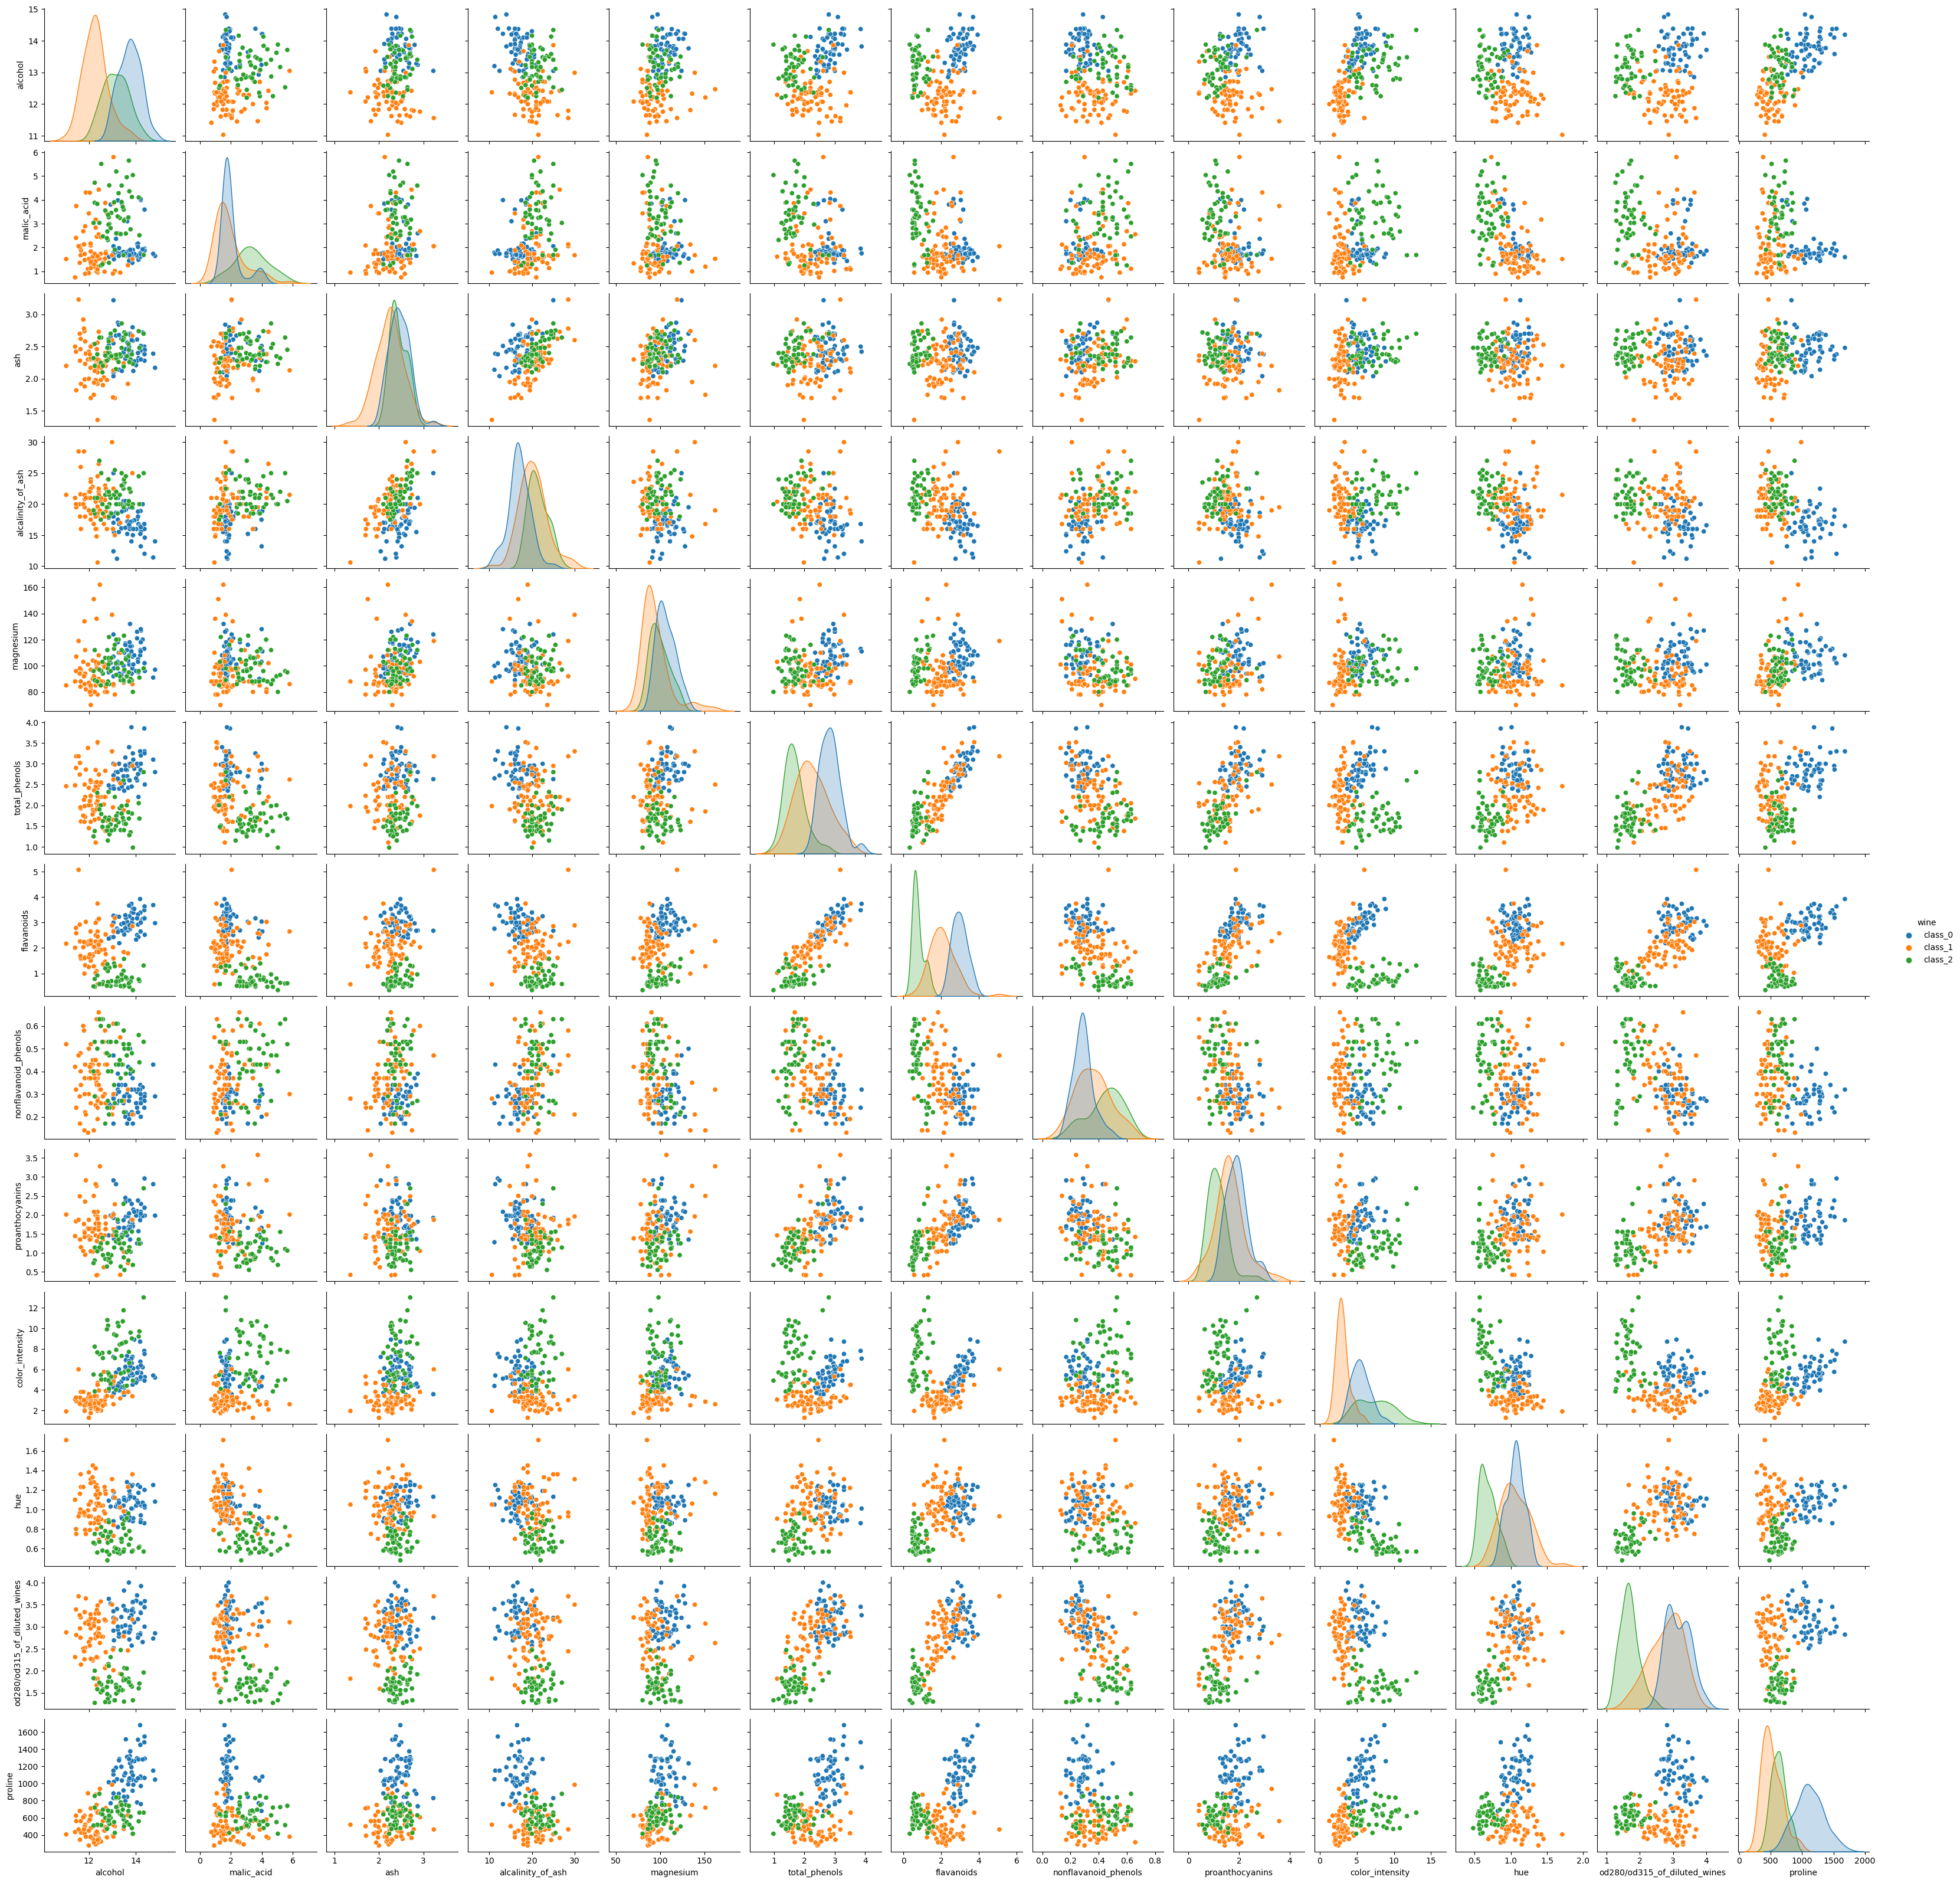

In [34]:
# Load Iris dataset
# Load Breast Cancer dataset

# iris = load_iris()
bc_wine = load_wine()

X = bc_wine.data
y = bc_wine.target
feature_names = bc_wine.feature_names

print(feature_names)

# # Convert to DataFrame for easier visualization
df = pd.DataFrame(X, columns=feature_names)
df["wine"] = pd.Categorical.from_codes(y, bc_wine.target_names)

# print(df)
# Visualize the dataset
sns.pairplot(df, hue="wine")
# sns.pairplot(df)
plt.show()


# Part 3: Baseline Models
Train a simple decision tree classifier:

In [71]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Train Decision Tree
dt = DecisionTreeClassifier(max_depth=2, random_state=42)
dt.fit(X_train, y_train)

# Evaluate
y_pred = dt.predict(X_test)

dt_accuracy = accuracy_score(y_test, y_pred)
    
print(f"Decision Tree Accuracy: {dt_accuracy:.2f}")

Decision Tree Accuracy: 0.87


# Part 4: Implement a Simple Ensemble with Multiple Method

1- Modify the above code to include Voting Classifier combining multiple models. 

In [74]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Initialize base models
dt = DecisionTreeClassifier(max_depth=2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=3)
lr = LogisticRegression(solver='liblinear', random_state=42)

# Create VotingClassifier ensemble with soft voting
voting_clf = VotingClassifier(
    estimators=[('dt', dt), ('knn', knn), ('lr', lr)])

# Cross-validation to evaluate stability
scores = cross_val_score(voting_clf, X, y, cv=5)
print(f"Voting Classifier CV Accuracy: {scores.mean():.2f}")

Voting Classifier CV Accuracy: 0.90


# Part 5: Implement Ensemble Method Using BagginClassifier
Bagging Classifier:

In [75]:
from sklearn.ensemble import BaggingClassifier

# Create a base decision tree model
base_tree = DecisionTreeClassifier(max_depth=2, random_state=42)

# Create a BaggingClassifier using decision trees as base estimators
bagged_tree = BaggingClassifier(
    base_estimator=base_tree,
    n_estimators=30,         # Number of trees in the ensemble
    max_samples=0.5,         # Use 50% of data for each tree
    bootstrap=True,          # Sampling with replacement
    random_state=42
)

# Train the bagged ensemble
bagged_tree.fit(X_train, y_train)

# Predict on test data
y_pred = bagged_tree.predict(X_test)

# Evaluate accuracy
bagged_tree_accuracy = accuracy_score(y_test, y_pred)

print(f"Bagged Decision Tree Accuracy: {bagged_tree_accuracy:.2f}")

Bagged Decision Tree Accuracy: 0.96


# Part 6: Compare Results

In [76]:
print(f"Decision Tree Accuracy: {dt_accuracy:.2f}")

print(f"Bagged Decision Tree Accuracy: {bagged_tree_accuracy:.2f}")

Decision Tree Accuracy: 0.87
Bagged Decision Tree Accuracy: 0.96
